## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [3]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/META_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [4]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [5]:
merged_df = pd.merge(news_df, stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [6]:
merged_df.shape
merged_df.sample(5)

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
560852,eBay to Integrate Visa QIWI Wallet In Russia,https://www.benzinga.com/news/14/10/4965705/eb...,Hal Lindon,2014-10-30 00:00:00+00:00,QIWI,0.000000,2014-10-30 00:00:00+00:00,75.050003,75.349998,72.900002,74.110001,73.958023,83270000.0,0.0,0.0
536416,Deutsche Bank Says Pfizer Has A Strong Financi...,https://www.benzinga.com/analyst-ratings/analy...,Jayson Derrick,2014-08-27 00:00:00+00:00,AZN,0.411111,2014-08-27 00:00:00+00:00,75.269997,75.489998,74.459999,74.629997,74.476959,36323000.0,0.0,0.0
907440,Cardiome Reports Licensing Agreement for XYDAL...,https://www.benzinga.com/news/17/06/9634980/ca...,Paul Quintaro,2017-06-21 00:00:00+00:00,CRME,0.000000,2017-06-21 00:00:00+00:00,152.360001,154.080002,151.880005,153.910004,153.594376,15039800.0,0.0,0.0
321979,Orient Paper Cuts FY EPS Guidance from $0.98-1...,https://www.benzinga.com/news/12/11/3072919/or...,Paul Quintaro,2012-11-08 00:00:00+00:00,ONP,0.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078021,Compass Minerals Sees Q3 EPS $2.20-$2.50 vs $2...,https://www.benzinga.com/news/18/10/12548673/c...,Benzinga Newsdesk,2018-10-23 00:00:00+00:00,CMP,0.000000,2018-10-23 00:00:00+00:00,151.220001,154.770004,150.850006,154.389999,154.073395,19095000.0,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [7]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(992704, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [8]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
331713,"Citigroup Reiterates Buy Rating, $58 PT on Dic...",https://www.benzinga.com/analyst-ratings/analy...,Dwight Einhorn,2012-12-12 00:00:00+00:00,DKS,0.0,2012-12-12 00:00:00+00:00,28.0,28.139999,27.370001,27.58,27.523441,46704200.0,0.0,0.0,NaN
331714,Blackout Averted: AMC and Verizon Make Peace,https://www.benzinga.com/news/12/12/3168146/bl...,Minyanville,2012-12-12 00:00:00+00:00,DTV,0.0,2012-12-12 00:00:00+00:00,28.0,28.139999,27.370001,27.58,27.523441,46704200.0,0.0,0.0,0.0
331715,Muni Bond ETFs Wither on Tax Talk,https://www.benzinga.com/markets/bonds/12/12/3...,ETF Professor,2012-12-12 00:00:00+00:00,MUB,0.0,2012-12-12 00:00:00+00:00,28.0,28.139999,27.370001,27.58,27.523441,46704200.0,0.0,0.0,0.0
331716,US Stock Futures Up Ahead Of Fed Decision,https://www.benzinga.com/news/12/12/3165817/us...,Monica Gerson,2012-12-12 00:00:00+00:00,INFY,0.0,2012-12-12 00:00:00+00:00,28.0,28.139999,27.370001,27.58,27.523441,46704200.0,0.0,0.0,0.0
331717,6 Undervalued Utility Stocks for the Beginning...,https://www.benzinga.com/markets/12/12/3168383...,investingdaily,2012-12-12 00:00:00+00:00,ITC,0.0,2012-12-12 00:00:00+00:00,28.0,28.139999,27.370001,27.58,27.523441,46704200.0,0.0,0.0,0.0


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [9]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: -0.0006722202402201589, p-value: 0.5030092747845426


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [10]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: -0.00029601377624764567, p-value: 0.7680462634177821


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [11]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: -0.0002725664953514895, p-value: 0.768056194332984


The results show the following correlation values between news sentiment and daily stock return for META:

- **Pearson correlation:** -0.00067 (p-value: 0.5030)
- **Spearman correlation:** -0.00029 (p-value: 0.76804)
- **Kendall correlation:** -0.00027 (p-value: 0.76805)

**Interpretation:**

All three correlation coefficients are extremely close to zero, indicating almost no relationship between news sentiment and daily stock return in the dataset.
The p-values are much greater than 0.05, so these correlations are not statistically significant.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

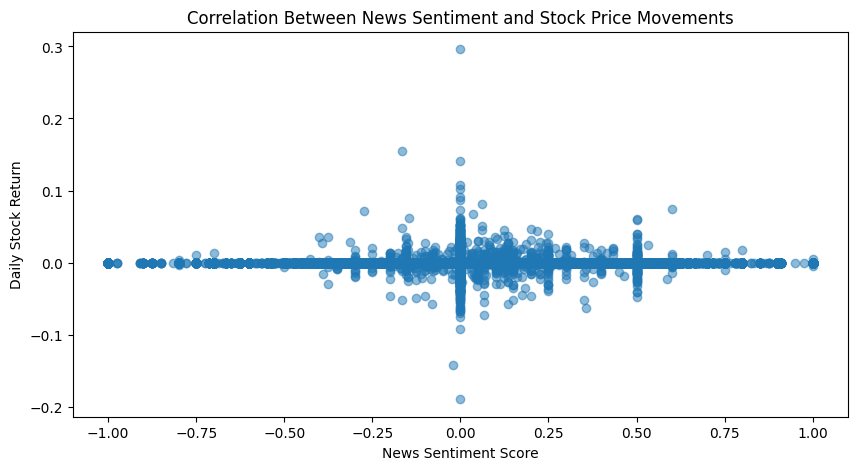

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

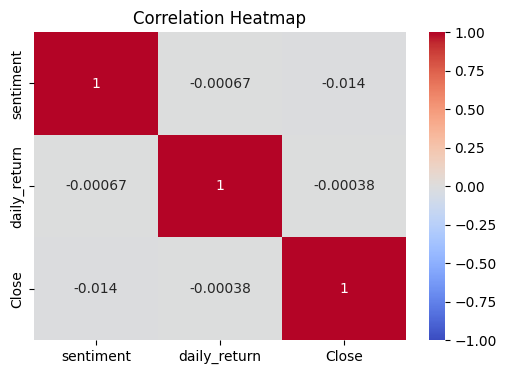

In [15]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()